🩺 Percentage of patients with heart disease: 51.32%
Accuracy: 0.9854
Precision: 1.0000
Recall: 0.9709
F1 Score: 0.9852
ROC-AUC Score: 0.9854
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



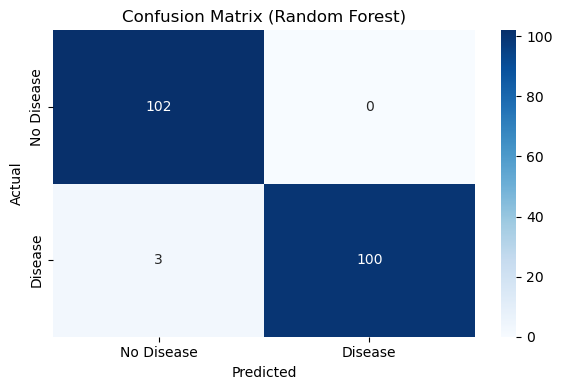

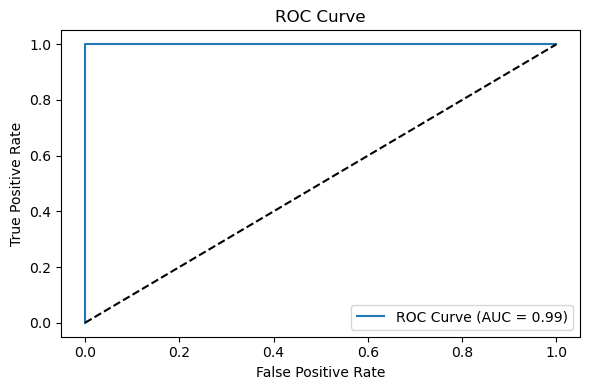

In [1]:
# 📥 NLP Step: Data Acquisition
# In NLP, this step involves collecting raw text data.
# For our project, the "text" is actually structured clinical data from a CSV file.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed from LogisticRegression to RandomForestClassifier

# Load the dataset
df = pd.read_csv("heart.csv")  # Data acquired from a public Kaggle dataset

# ✏️ NLP Step: Text Preparation
# This is where we'd clean text in NLP (e.g., HTML tag removal, lowercasing).
# In our structured data context, this would involve removing nulls, duplicates, encoding categories, etc.
# For this dataset, no cleanup is needed as it's already preprocessed.

# 🧪 Basic Text Preprocessing (Tokenization, Stopword Removal) would map to:
# Splitting into features and label

# Separate features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

# Show percentage of patients with heart disease
heart_disease_rate = y.mean() * 100
print(f"🩺 Percentage of patients with heart disease: {heart_disease_rate:.2f}%")

# 🔢 NLP Step: Feature Engineering
# In NLP, this includes converting text to numbers (TF-IDF, Word2Vec).
# Here, it's already numeric, so this step maps to splitting and preparing features for modeling.

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🧠 NLP Step: Modeling
# This step applies ML/DL algorithms to the engineered features.
# We're using Random Forest, ideal for binary classification.

model = RandomForestClassifier(random_state=42)  # Changed to Random Forest
model.fit(X_train, y_train)

# 🚀 NLP Step: Deployment
# In NLP, this might be via a chatbot or API.
# Here, we simulate deployment by saving the model to a .pkl file for later use.

import joblib
joblib.dump(model, "heart_model.pkl")

# 📏 NLP Step: Evaluation
# This includes Intrinsic Evaluation (technical metrics) and Extrinsic (user/business feedback).
# We're using standard classification metrics for intrinsic evaluation.

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Accuracy, Precision, Recall, F1
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# ROC-AUC Score (extra evaluation metric)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 🔍 Visual Evaluation - Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")  # Updated title to reflect new model
plt.tight_layout()
plt.show()

# 🔍 Visual Evaluation - ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()